## IMPORTING SOME IMPORTANT LIBRARIES


In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
warnings.simplefilter(action='ignore',category=FutureWarning)

## READING THE FILES


In [4]:
df=pd.read_csv("adult (1).csv",header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## NAMING THE COLUMNS

In [6]:
df.columns=["Age","Workclass","Fnlwgt","Education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
df.shape

(32561, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### REMOVING DUPLICATE VALUES

In [12]:
df.duplicated().sum()

24

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(32537, 15)

### FEATURE ENGINEERING

In [15]:
cat_feat=df.select_dtypes(include=['object']).columns
cat_feat

Index(['Workclass', 'Education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [16]:
df.describe()

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.tail()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [18]:
num_feat = df.select_dtypes(include=['int64']).columns
num_feat

Index(['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

#### SOME IMPORTANT GRAPH

<Figure size 1152x720 with 0 Axes>

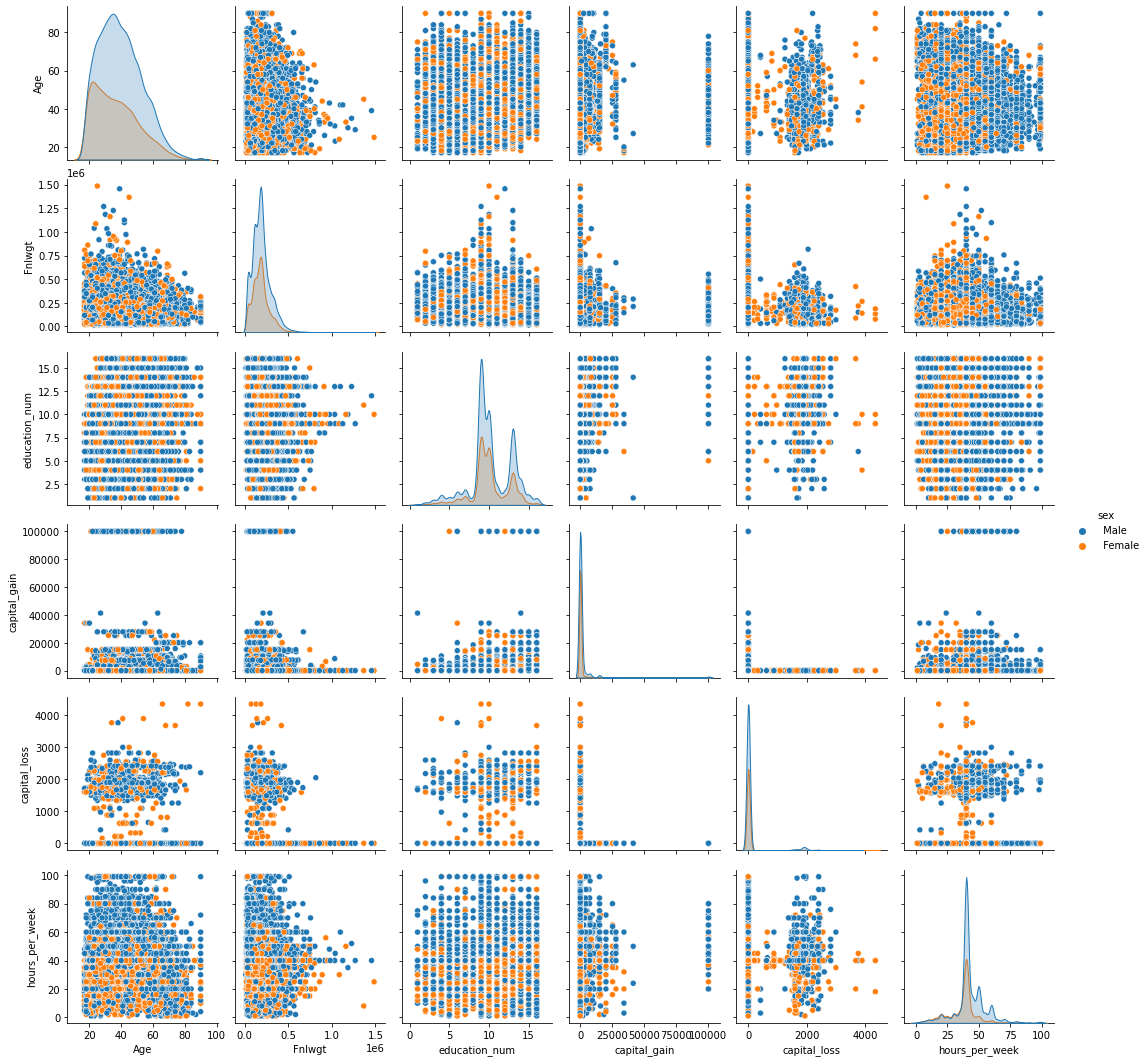

In [19]:
import seaborn as sns
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='sex')
plt.show()

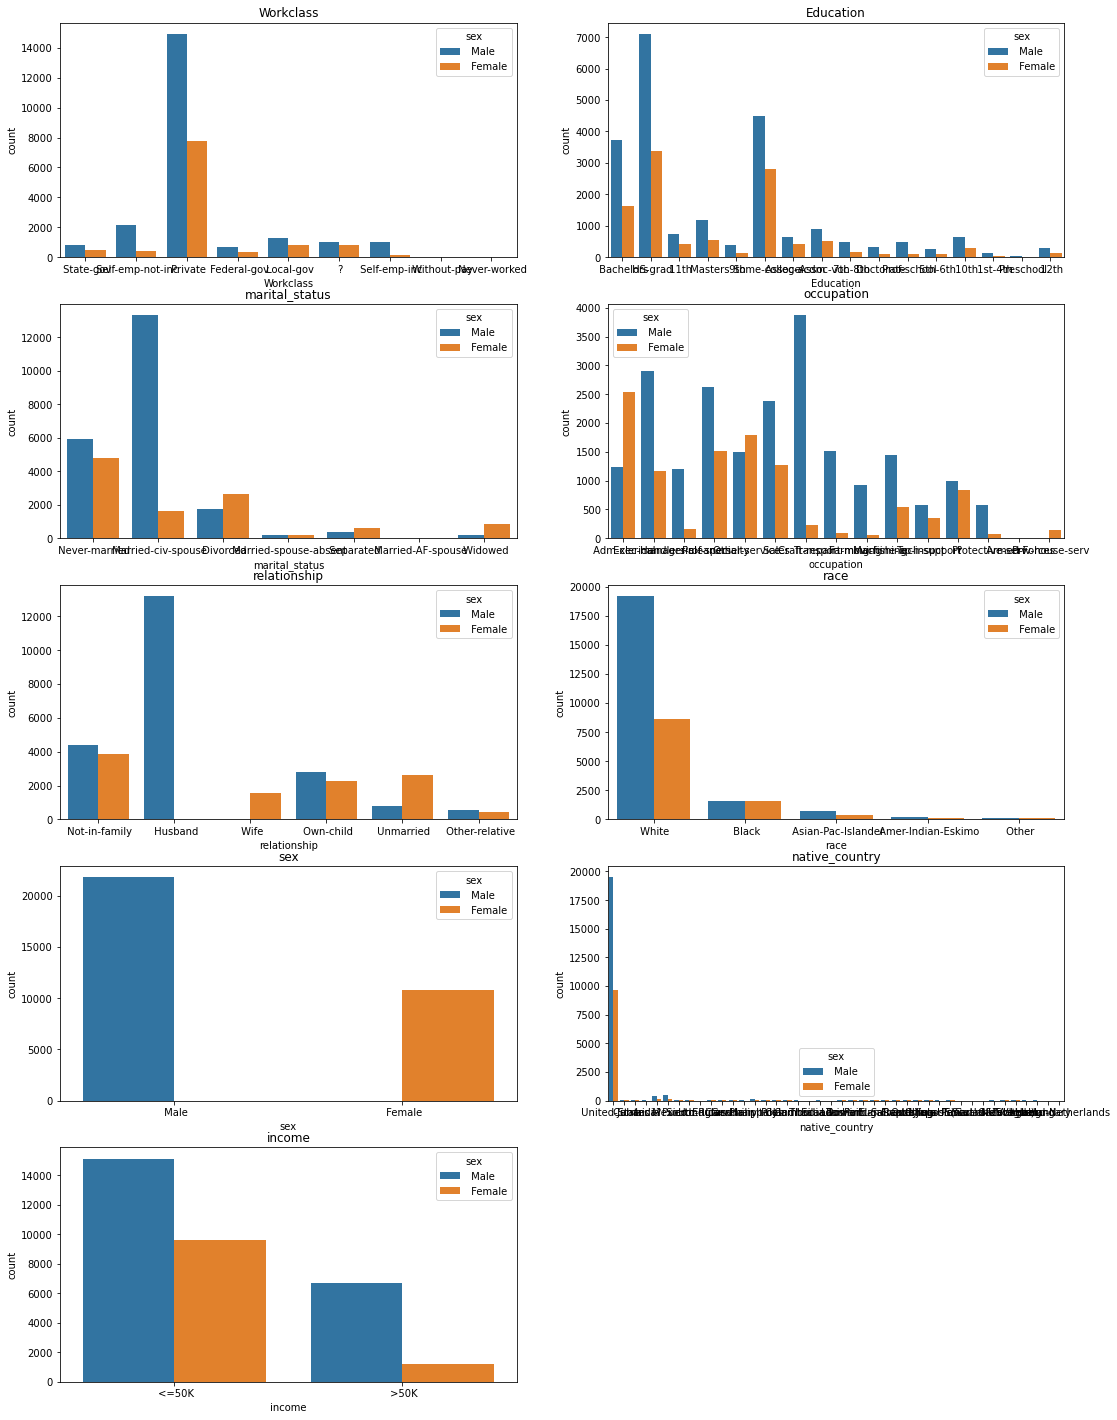

In [20]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='sex')
    plt.title(c)

plt.show()

In [21]:
num_feat = df.select_dtypes(include=['float', 'int']).columns
num_feat

Index(['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

## CORRELATION MATRIX

C:\Users\ravib\AppData\Local\Temp\ipykernel_20448\2240731626.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

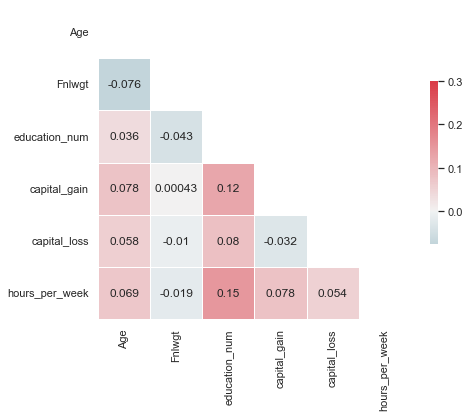

In [22]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[num_feat].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [23]:
df['income'] = pd.get_dummies(df['income'], prefix='income', drop_first=True)
y = df.income
df = df.drop(columns=['income'])

In [24]:
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

Ratio above 50k:  24.09%


In [25]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [26]:
cols = list(df.columns)
cols

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [27]:
selected_feat = cols.copy()

In [28]:
selected_feat

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [29]:
df_final = df[selected_feat]

In [30]:
cat_feat = df_final.select_dtypes(include=['object']).columns
X = pd.get_dummies(df_final[cat_feat], drop_first=True)

# IMPORTING SOME IMPORTANT MODEL ON WHICH I WILL TRAIN THE DATA AND PREDICT OUTPUT

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# SPLITING THE DATA INTO TRAIN AND TEST DATA

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [33]:
from sklearn.metrics import classification_report

In [34]:
from sklearn.metrics import confusion_matrix

## Function defination to implement model

In [35]:
def apply_model(model,x_train,y_train,x_test,y_test):
    m = model
    m.fit(x_train,y_train)
    print('Training score',m.score(x_train,y_train))
    print('Testing score',m.score(x_test,y_test))
    ypred = m.predict(x_test)
    print('y_pred\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Cls Report\n',classification_report(y_test,ypred))

### a) Gaussian Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
m1 = GaussianNB()
apply_model(m1,x_train,y_train,x_test,y_test)

Training score 0.4898382573283645
Testing score 0.4969268592501537
y_pred
 [0 1 1 ... 1 1 1]
Confusion Matrix
 [[1717 3206]
 [  68 1517]]
Cls Report
               precision    recall  f1-score   support

           0       0.96      0.35      0.51      4923
           1       0.32      0.96      0.48      1585

    accuracy                           0.50      6508
   macro avg       0.64      0.65      0.50      6508
weighted avg       0.81      0.50      0.50      6508



## b) Decision Tree

In [38]:
m2 = DecisionTreeClassifier(criterion='gini',max_depth=6)
apply_model(m2,x_train,y_train,x_test,y_test)

Training score 0.8293057743286334
Testing score 0.8277504609711125
y_pred
 [0 1 0 ... 0 0 1]
Confusion Matrix
 [[4542  381]
 [ 740  845]]
Cls Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4923
           1       0.69      0.53      0.60      1585

    accuracy                           0.83      6508
   macro avg       0.77      0.73      0.75      6508
weighted avg       0.82      0.83      0.82      6508



## c) Random Forest Classifier

In [39]:
m3 = RandomForestClassifier(n_estimators=40,max_depth=7,min_samples_split=15)
apply_model(m3,x_train,y_train,x_test,y_test)

Training score 0.8191632410004226
Testing score 0.8185310387215734
y_pred
 [0 1 0 ... 0 0 1]
Confusion Matrix
 [[4741  182]
 [ 999  586]]
Cls Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4923
           1       0.76      0.37      0.50      1585

    accuracy                           0.82      6508
   macro avg       0.79      0.67      0.69      6508
weighted avg       0.81      0.82      0.79      6508



## d) Logistic Regression

In [40]:
m4 = LogisticRegression(solver='liblinear')
apply_model(m4,x_train,y_train,x_test,y_test)

Training score 0.8327250374582197
Testing score 0.832821143208359
y_pred
 [0 1 0 ... 0 0 1]
Confusion Matrix
 [[4545  378]
 [ 710  875]]
Cls Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4923
           1       0.70      0.55      0.62      1585

    accuracy                           0.83      6508
   macro avg       0.78      0.74      0.75      6508
weighted avg       0.82      0.83      0.83      6508



## e) KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
m4 = KNeighborsClassifier(n_neighbors=25)
apply_model(m4,x_train,y_train,x_test,y_test)

Training score 0.8346843904875332
Testing score 0.822679778733866
y_pred
 [0 1 0 ... 0 0 1]
Confusion Matrix
 [[4450  473]
 [ 681  904]]
Cls Report
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4923
           1       0.66      0.57      0.61      1585

    accuracy                           0.82      6508
   macro avg       0.76      0.74      0.75      6508
weighted avg       0.82      0.82      0.82      6508



### By implementing several model i found that Logistic Regression model is quite good among these model as its accuracy score is high as compare to other model.
### Thanking You For This Project.